In [1]:
import warnings
warnings.filterwarnings('ignore')
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!git clone https://github.com/pysource7/calculate_object_area_exercise
import sys
sys.path.append("/content/calculate_object_area_exercise/mrcnn")
from mrcnn_colab_engine import *
!wget https://import.cdn.thinkific.com/338732/courses/854812/mask_rcnn_object_0009-220120-123759.h5
!wget -O lego_image_sample.jpg https://pysource.com/wp-content/uploads/2022/01/img1.jpg
MODEL_DIR = "/content/mask_rcnn_object_0009-220120-123759.h5"
# Load Mask rcnn model
config = InferenceConfig()
lego_model = modellib.MaskRCNN(mode="inference", model_dir="", config=config)
# Load weights generated to detect 4 lego categories
lego_model.load_weights(MODEL_DIR, by_name=True)

# Mask RCNN model + Functions
from google.colab.patches import cv2_imshow
from mrcnn_colab_engine import random_colors, draw_mask, detect_contours_maskrcnn
class_names = ["BG", "green", "blue", "light blue", "pink"]
# Generate random colors
colors = random_colors(len(class_names))

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 12.0 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
Cloning into 'calculate_object_area_exercise'...
remote: Enumerating objects: 1016, done.
remote: Total 1016 (delta 0), reused 0 (delta 0), pack-reused 1016
Receiving objects: 100% (1016/1016), 127.25 MiB | 21.13 MiB/s, done.
Resolving deltas: 100% (604/604), done.


Using TensorFlow backend.


--2022-02-07 15:14:47--  https://import.cdn.thinkific.com/338732/courses/854812/mask_rcnn_object_0009-220120-123759.h5
Resolving import.cdn.thinkific.com (import.cdn.thinkific.com)... 151.101.2.132, 151.101.66.132, 151.101.130.132, ...
Connecting to import.cdn.thinkific.com (import.cdn.thinkific.com)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255923688 (244M) [application/octet-stream]
Saving to: ‘mask_rcnn_object_0009-220120-123759.h5’

mask_rcnn_object_00 100%[===================>] 244.07M  9.20MB/s    in 27s     

2022-02-07 15:15:15 (9.07 MB/s) - ‘mask_rcnn_object_0009-220120-123759.h5’ saved [255923688/255923688]

--2022-02-07 15:15:15--  https://pysource.com/wp-content/uploads/2022/01/img1.jpg
Resolving pysource.com (pysource.com)... 188.114.97.3, 188.114.96.3, 2a06:98c1:3120::3, ...
Connecting to pysource.com (pysource.com)|188.114.97.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 882273 (862K) [image/jpeg

In [2]:
RATIO_PIXEL_TO_CM = 78 # 78 pixels are 1cm
RATIO_PIXEL_TO_SQUARE_CM = 78 * 78

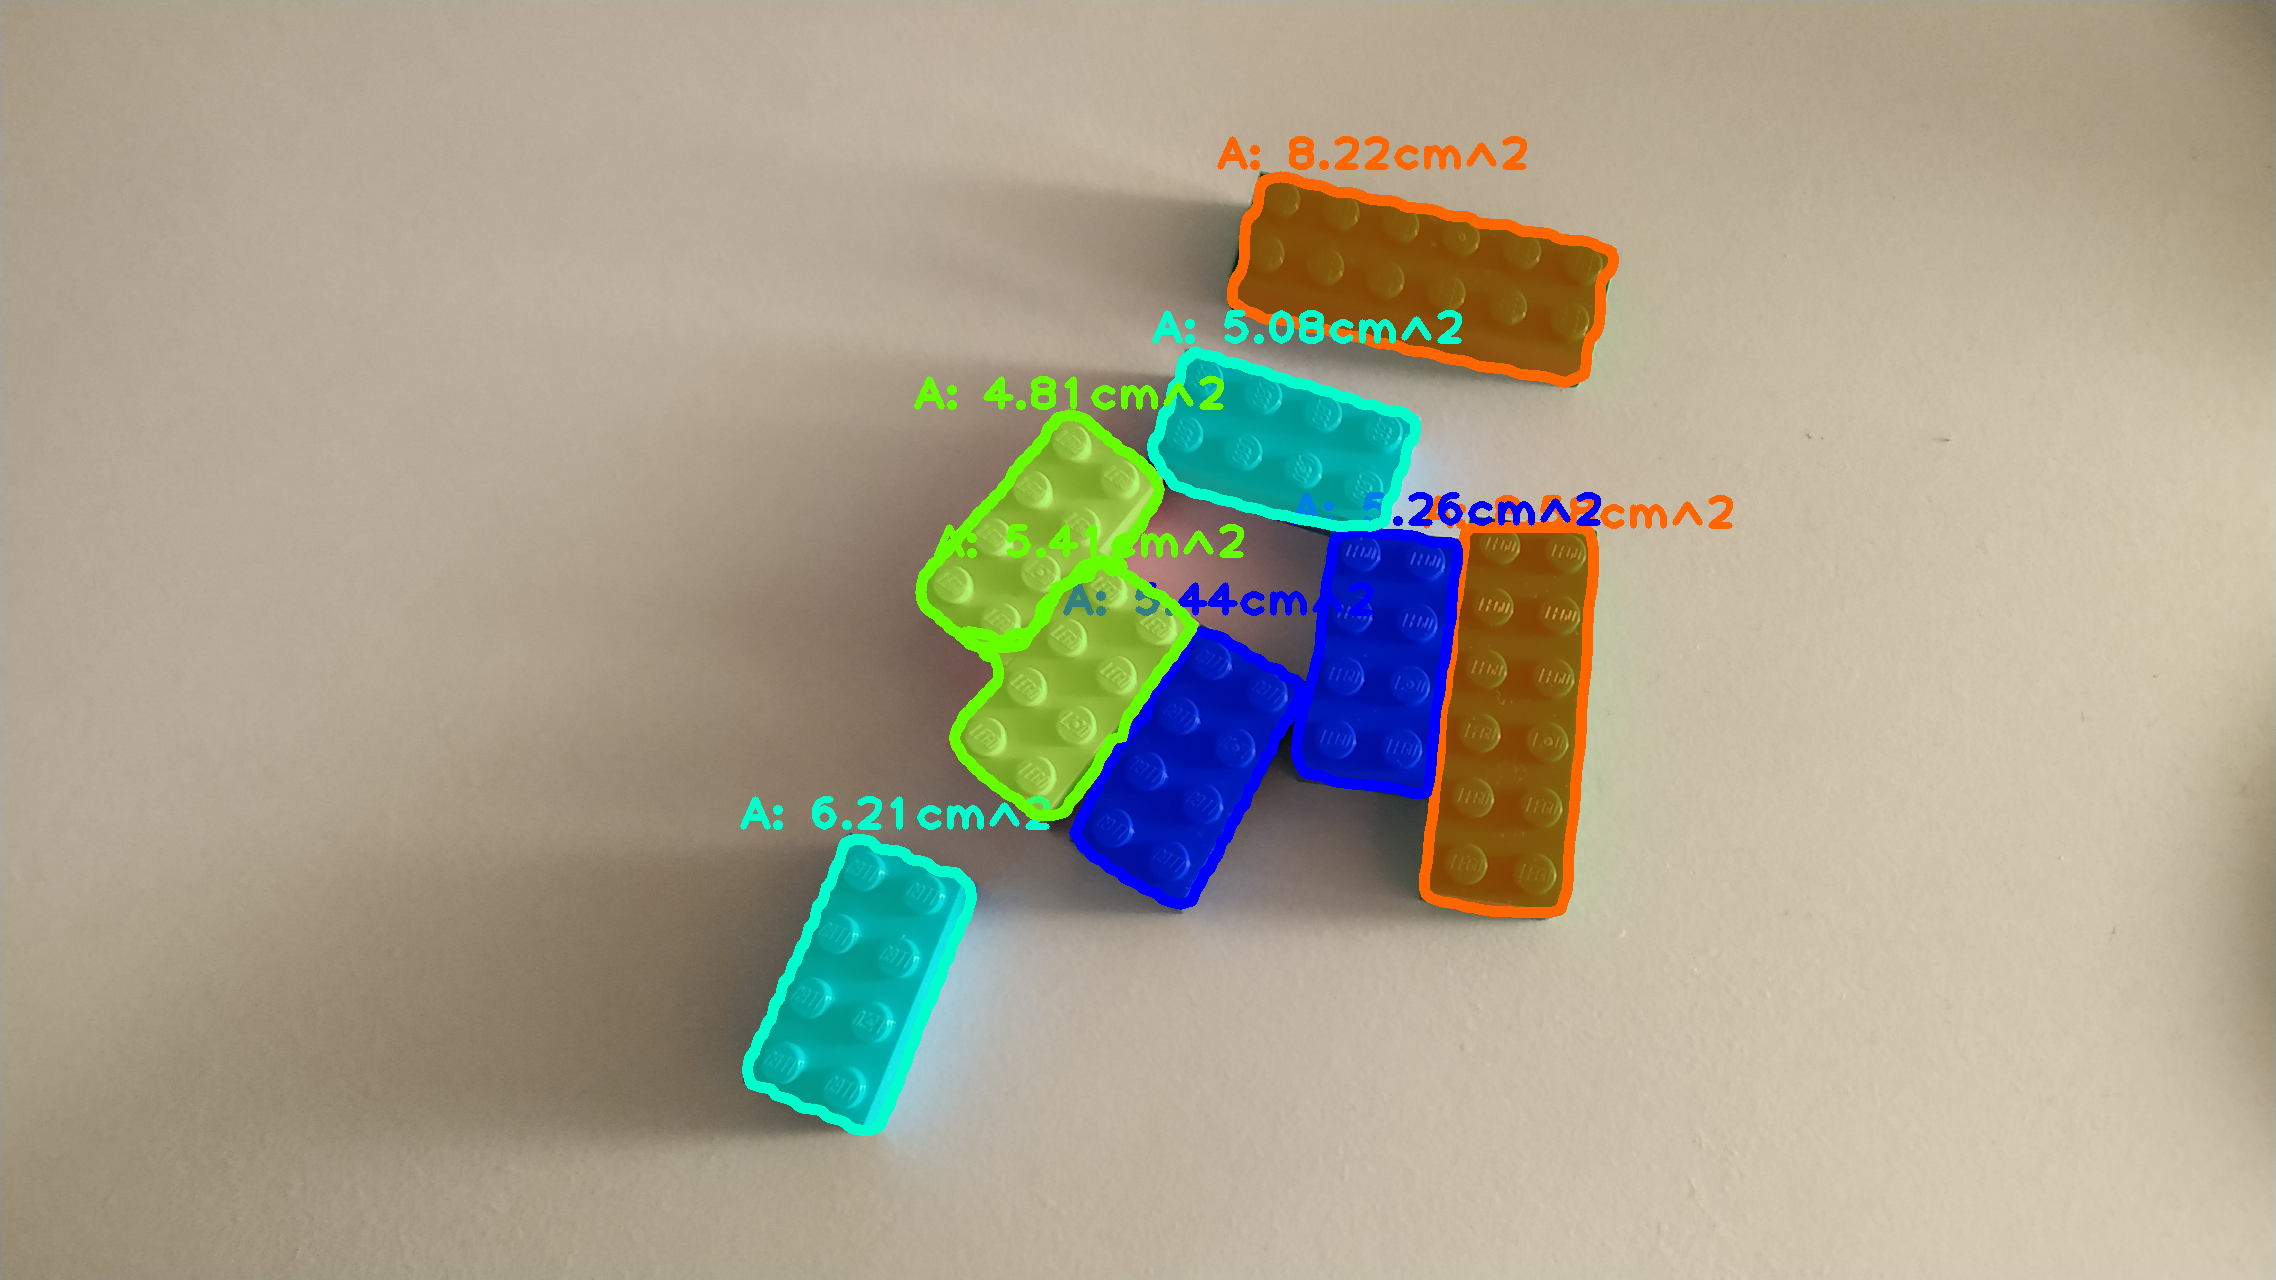

In [4]:
import cv2
from mrcnn_colab_engine import detect_contours_maskrcnn, draw_mask

img = cv2.imread("lego_image_sample.jpg")

# 1. Get objects mask with Mask RCNN
class_ids, boxes, masks = detect_contours_maskrcnn(lego_model, img)
for class_id, box, object_contours in zip(class_ids, boxes, masks):
    # Box
    y1, x1, y2, x2 = box
    # cv2.rectangle(img, (x1, y1), (x2, y2), colors[class_id], 15)
    cv2.polylines(img, [object_contours], True, colors[class_id], 10)
    img = draw_mask(img, [object_contours], colors[class_id])

    # 2. Calculate area
    area_px = cv2.contourArea(object_contours)
    area_cm = round(area_px / RATIO_PIXEL_TO_SQUARE_CM, 2)

    cv2.putText(img, "A: {}cm^2".format(area_cm), (x1, y1), cv2.FONT_HERSHEY_PLAIN, 3, colors[class_id], 5)


cv2_imshow(img)